# Computational Physics Tutorial 3

## SNGNKO003

### Magnetic Field of a Finite Solenoid

Here we are given a solenoid with an inner diameter of $20$ mm, an outer diameter of $50$ mm and a length of $60$ mm. We also know that the current density in the solenoid is $1Am^{-2}$. We are required to calculate the magnetic field at 4 different positions: 1). At the center of the solenoid, 2). at the inner boundary in the middle of the solenoid, 3). 10 mm away from the inner boundary and 4). 10 mm away from the outer boundary.

Before we calculate magnetic field, we need to find an expression for the magnetic field at any position. To do this, we look into the Boit-Savart law which states:

$$B(r) = \frac{\mu_0}{4\pi}\int\int\int_C \frac{Idl \times r'}{|r'|^3}$$

Since we are working with 3 dimensional space here, we can rewrite it as:

$$B(r) = \frac{\mu_0}{4\pi}\int\int\int \frac{JdV \times r'}{|r'|^3}$$

where $B(r)$ is the magnetic field at position $r$, $\mu_0$ is the permeablity of free space, $J$ is the current density, $dV$ is the infinitesimal volume element we are integrating over and $r'$ is the displacement from the solenoid to the position $r$. 

To make this integral somewhat easier to compute, we look at the geometry of the soleniod. We notice that it is a hollow cylinder with thickness dx. Since we are dealing with a cylinder, we're going to use cylindral coordinates to calculate the integral over all space. 

This integral is now:
$$B(r) = \frac{\mu_0}{4\pi}\int_{0}^{L}\int_{0}^{2\pi}\int_{0}^{r} \frac{J\times r'}{|r'|^3}r'dr'd\theta dz$$

We simplify the cross product in the integrand and write it as:
$$J \times r' = Jr' \sin{\theta}$$

where $\theta$ is the angle between the two vectors $J$ and $r'$.

So we can now write the integral as:
$$B(r) = \frac{\mu_0}{4\pi}\int_{0}^{L}\int_{0}^{2\pi}\int_{0}^{r} \frac{Jr'\sin{\theta}}{|r'|^3}r'dr'd\theta dz$$

We can further simplify this by evaluating the outer integral:
$$B(r) = \frac{\mu_0 JL}{4\pi}\int_{0}^{2\pi}\int_{0}^{r} \frac{\sin{\theta}}{r'}dr'd\theta$$

When we reach this point, we can employ numerical integration methods. We use a python package to integrate this. $\textbf{scipy.integrate.tplquad}$

We notice that current density has units of $Am^{-2}$, so we change this such that it has units $Am^{-3}$. To do that, We multiply the current density with the area of the width $dx$ times the length $L$ and divide by the volume of the cylinder. Now we have:

$$J = \frac{I(dx \times L)}{\pi (r_{outer}^2 - r_{inner}^2) L}$$

Now that we have everything in place, we put it into python.

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import magpylib as magpy

### Constants ###
I = 1
L = 60e-3                                           # Am^-2
A = L*(15e-3)                                       # m^2
V = (np.pi*(50e-3)**2 - np.pi*(20e-3)**2)*L         # m^3
J = I*A/V                                           # Am^-3
mu_0 = 4*np.pi*1e-7                                 # Permeability of free space
c = mu_0*J/4*np.pi

### The magnitudes of the positions we are evaluating the magnetic field ###
r1 = np.sqrt((30e-3)**2+0)
r2 = np.sqrt((30e-3)**2 + (10e-3)**2)
r3 = np.sqrt((70e-3)**2 + (10e-3)**2)
r4 = np.sqrt((70e-3)**2 + (25e-3)**2)
pos = np.array([r1, r2, r3, r4])

### We define a function that to calculate the magnetic field at position r ###
def Bfield(r):    
    f = lambda theta, r, z: (c*np.sin(theta))/r
    B = integrate.tplquad(f, 0, 2*np.pi, 0.0000001, r, 0, L)
    return B


print("The Magnetic Field at the center of the solenoid is:\n", Bfield(pos[0]), "T")
print("The Magnetic Field at the inner boundary in the middle of the solenoid:\n", Bfield(pos[1]), "T")
print("The Magnetic Field 10mm outside the inner boundary of the solenoid is:\n", Bfield(pos[2]), "T")
print("The Magnetic Field 10mm outside the outer boundary of the solenoid is:\n", Bfield(pos[3]), "T")

The Magnetic Field at the center of the solenoid is:
 (3.2043857898956647e-07, 8.70373195859915e-09) T
The Magnetic Field at the inner boundary in the middle of the solenoid:
 (3.218560480456237e-07, 9.466748116210393e-09) T
The Magnetic Field 10mm outside the inner boundary of the solenoid is:
 (3.424852139752691e-07, 1.1268268016962998e-08) T
The Magnetic Field 10mm outside the outer boundary of the solenoid is:
 (3.438677554311481e-07, 1.2162291461194905e-08) T


The code above calculates and prints the magnetic field at that position by integrating over all space up until the position of interest $r$. We can see here that the position integral does not start exactly at zero because we have a divergence there. We made it such that it starts slightly above zero to avoid divergences.

The next part is for visualizing the magnetic field at all positions. We also use a python package to plot these magnetic fields. To use this package, we first create the solenoid i.e. the hollow cylinder using the $\textbf{magpy}$ package. 

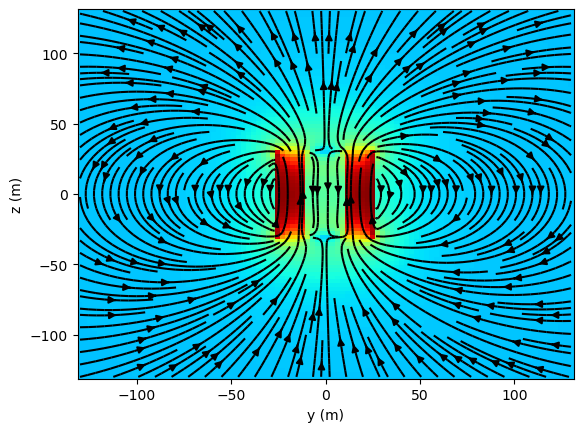

In [11]:
### To calculate and visualize the magnetic field at all positions ###

# positions over all space.
xs = np.linspace(-130,130,100)
zs = np.linspace(-130,130,100)
rs = np.sqrt(xs**2+zs**2)
posis = [[x,0,z] for z in zs for x in xs]

# creating the hallow cylinder
c1 = magpy.magnet.Cylinder(magnetization = (0,0,0.5e3), dimension = (50,60))  # the dimensions of the outer cyliner in mm.
c2 = magpy.magnet.Cylinder(magnetization = (0,0,-0.5e3), dimension = (20,60)) # the dimentions of the inner cylinder in mm.
cyl = magpy.Collection(c1,c2)
# magpy.show(cyl, backend='plotly', animation=3)

### calculate and plot the amplitude of the magnetic field and the field lines ###
B = [cyl.getB(pos) for pos in posis]
Bs = np.array(B).reshape([100,100,3])       
Bamp = np.linalg.norm(Bs,axis=2)            # magnitude of the magnetic field
X,Z = np.meshgrid(xs,zs)
plt.pcolor(xs,zs,Bamp,cmap='jet',vmin=-200)
U,V = Bs[:,:,0], Bs[:,:,2]
plt.streamplot(X,Z,U,V,color='k',density=2)
plt.ylabel("z (m)")
plt.xlabel("y (m)")
plt.show()

This is a visual of the top-down view of the magnitic field over all space. It looks pretty neat.